In [1]:
import cv2
import numpy as np
from img_tools import *
import matplotlib.pyplot as plt

from IPython.display import Video

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

# Transformada de Hough

*Sudoku*: Imagen a procesar, y sus bordes:

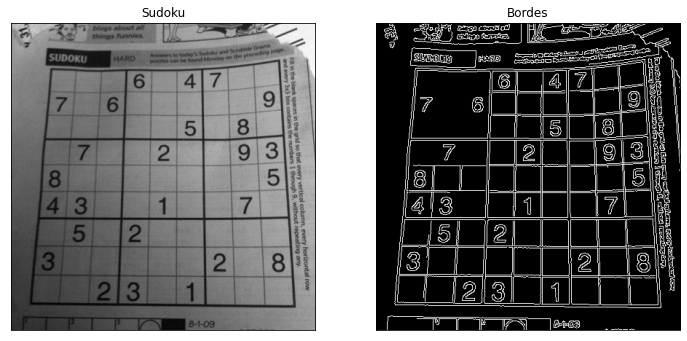

In [3]:
imgSudoku = cv2.imread('data/img/sudoku.jpg')
imgSudokuGray = cv2.cvtColor(imgSudoku,cv2.COLOR_BGR2GRAY)
imgSudokuEdges = cv2.Canny(imgSudokuGray,50,150,apertureSize = 3)
plt_multiple_cv_images([imgSudokuGray, imgSudokuEdges], ['Sudoku', 'Bordes'])

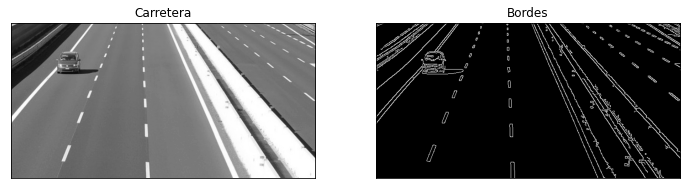

In [4]:
imgLanes = cv2.imread('data/img/lanes.png')
imgLanesGray = cv2.cvtColor(imgLanes,cv2.COLOR_BGR2GRAY)
imgLanesEdges = cv2.Canny(imgLanesGray,50,200,apertureSize = 3)
plt_multiple_cv_images([imgLanesGray, imgLanesEdges], ['Carretera', 'Bordes'])

## Transformada de Hough para Líneas

Fragmento de video tomado de: https://www.youtube.com/watch?v=4zHbI-fFIlI

In [5]:
%%HTML
<video width="680" controls>
  <source src="res/video/hough_trans_lines.mp4" type="video/mp4">
</video>

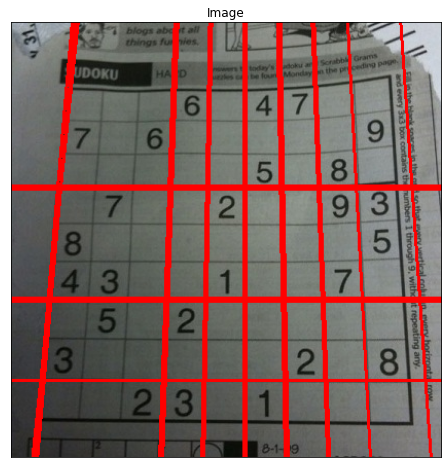

In [17]:
imgSudokuLines = imgSudoku.copy()

lines = cv2.HoughLines(imgSudokuEdges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(imgSudokuLines,(x1,y1),(x2,y2),(0,0,255),2)

plt_cv_image(imgSudokuLines)

## Transformada de Hough Probabilística para Líneas

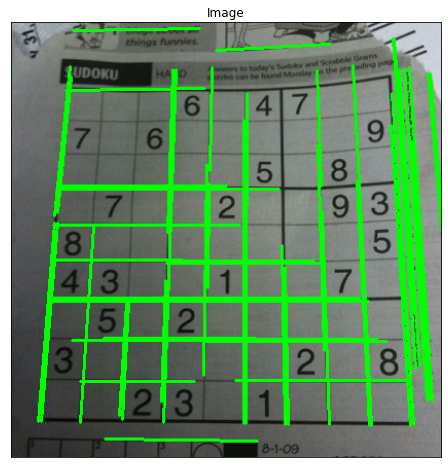

In [18]:
imgSudokuLines2 = imgSudoku.copy()

lines = cv2.HoughLinesP(imgSudokuEdges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(imgSudokuLines2,(x1,y1),(x2,y2),(0,255,0),2)

plt_cv_image(imgSudokuLines2)

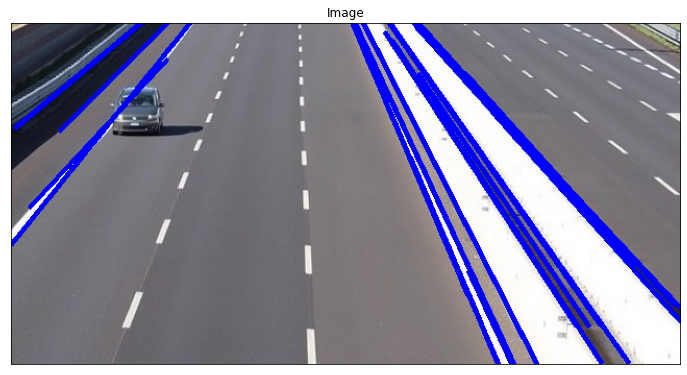

In [19]:
imgLanesLines = imgLanes.copy()

lines = cv2.HoughLinesP(imgLanesEdges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(imgLanesLines, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt_cv_image(imgLanesLines)

## Transformada de Hough para Círculos

Fragmento de video tomado de: https://www.youtube.com/watch?v=Ltqt24SQQoI

In [20]:
%%HTML
<video width="680" controls>
  <source src="res/video/hough_trans_circles.mp4" type="video/mp4">
</video>

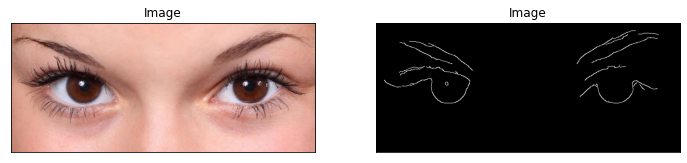

In [26]:
imgEyes = cv2.imread('data/img/eyes.png', cv2.IMREAD_COLOR)
imgEyesGray = cv2.cvtColor(imgEyes, cv2.COLOR_BGR2GRAY)
imgEyesGrayBlur = cv2.medianBlur(imgEyesGray, 15)
imgSudokuEdges = cv2.Canny(imgEyesGrayBlur,50,150,apertureSize = 3)
                           
plt_multiple_cv_images([imgEyes, imgSudokuEdges])

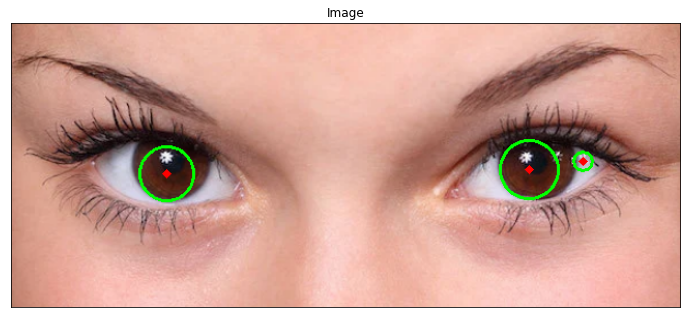

In [27]:
imgEyesCircles = imgEyes.copy()

circles = cv2.HoughCircles(imgEyesGrayBlur, cv2.HOUGH_GRADIENT, 1, imgEyesCircles.shape[0]/64, param1=300, param2=10, minRadius=5, maxRadius=30)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(imgEyesCircles, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(imgEyesCircles, (i[0], i[1]), 2, (0, 0, 255), 3)

plt_cv_image(imgEyesCircles)